# Chaos Classification: A Machine Learning Approach

Goal of the presentation:
* Visualize some of the general concepts of Supervised Learning
* Use our code to predict the stability of the system
* Analyze the working components of our solution

## 1-Hands-on introduction to Supervised Learning

We load the dataset, which has 3 possible classes, and eliminate the third. We keep two observable variables:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris

np.random.seed(0)
tf.random.set_seed(0)

# Load dataset
X, y = load_iris(return_X_y=True)

# Eliminate the third class
X = X[np.where(y != 2)[0]][:,0:2]
y = y[np.where(y != 2)[0]]

Let's visualize the data distribution along the first two dimensions:

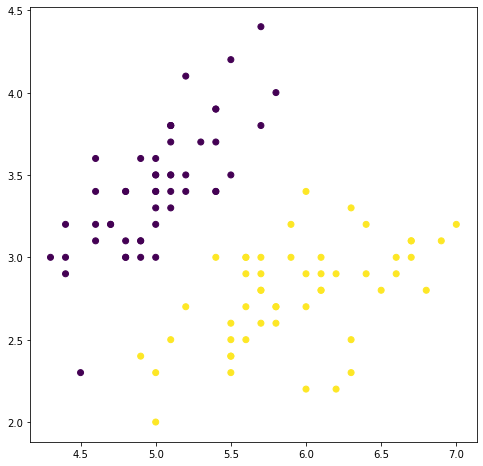

In [2]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y)

## 1.1-Visualizing the decision boundary
Let's now train a Random Forest classifier on the dataset:

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Create Forest
# max_depth = 10 means maximum 10 branches
# random_state = 0 is to seed the RNG
clf = RandomForestClassifier(max_depth=10, random_state=0)

# Train Forest
clf = clf.fit(X,y)

We now prepare a grid to sample our decision boundary along the first two dimensions:

In [4]:
def DecisionBoundary(X, N, model, predict_fn):
    # Take N evenly spaced points
    X_1 = np.linspace(X[:,0].min(), X[:,0].max(), N)
    X_2 = np.linspace(X[:,1].min(), X[:,1].max(), N)

    # Get the data in dataset form
    x1, x2 = np.meshgrid(X_1, X_2)
    x1 = x1.flatten()
    x2 = x2.flatten()

    X_test = np.zeros((N*N, 2))
    X_test[:, 0] = x1
    X_test[:, 1] = x2
    
    
    # Predict the classes from the model
    y_test = predict_fn(X_test)
    
    # Create colors
    colors = ['cyan' if el==0 else 'orange' for el in y]

    plt.figure(figsize=(8,7))
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=0.5)
    plt.scatter(X[:,0], X[:,1], color=colors, s=30)
    plt.contour(X_test[:,0].reshape(N,N), X_test[:,1].reshape(N,N), y_test.reshape(N,N), levels=[0.5], colors='r')
    plt.show()

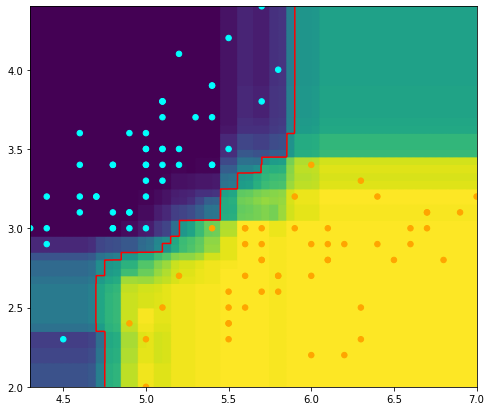

In [5]:
# lambda is a syntax to define quickly a function in one line
predict = lambda x : clf.predict_proba(x)[:,1]

DecisionBoundary(X, 500, clf, predict)

## 1.2-Underfitting vs Overfitting

Let us now create some Neural Networks to illustrate the problem of overfitting vs underfitting

In [6]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

def MakeModel(depth):
    model = Sequential()
    # Create an input layer
    model.add(Dense(4, input_dim=2, activation='relu'))
    
    # Add many deep layers
    for i in range(depth):
        model.add(Dense(16, activation='relu'))
        #model.add(BatchNormalization())
     
    # Add a final layer
    model.add(Dense(1, activation='sigmoid'))
    
    opt = keras.optimizers.Adam(learning_rate=0.0005)
    
    # Use crossentropy as a loss and adam as an optimizer. Track the accuracy of the model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [7]:
model = MakeModel(1)

model.fit(X, y, epochs=250, batch_size=20, verbose=1)

Epoch 1/250
5/5 [==============================] - 0s 2ms/step - loss: 0.7175 - accuracy: 0.5000
Epoch 2/250
5/5 [==============================] - 0s 3ms/step - loss: 0.7099 - accuracy: 0.5000
Epoch 3/250
5/5 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.5000
Epoch 4/250
5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 5/250
5/5 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 6/250
5/5 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5000
Epoch 7/250
5/5 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5000
Epoch 8/250
5/5 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5000
Epoch 9/250
5/5 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5000
Epoch 10/250
5/5 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.5000
Epoch 11/250
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.9800
Epoch 166/250
5/5 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.9800
Epoch 167/250
5/5 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.9800
Epoch 168/250
5/5 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.9800
Epoch 169/250
5/5 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.9800
Epoch 170/250
5/5 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.9800
Epoch 171/250
5/5 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.9800
Epoch 172/250
5/5 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.9800
Epoch 173/250
5/5 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.9900
Epoch 174/250
5/5 [==============================] - 0s 4ms/step - loss: 0.3985 - accuracy: 0.9900
Epoch 175/250
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9800
Epoch 248/250
5/5 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9800
Epoch 249/250
5/5 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9800
Epoch 250/250
5/5 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9800


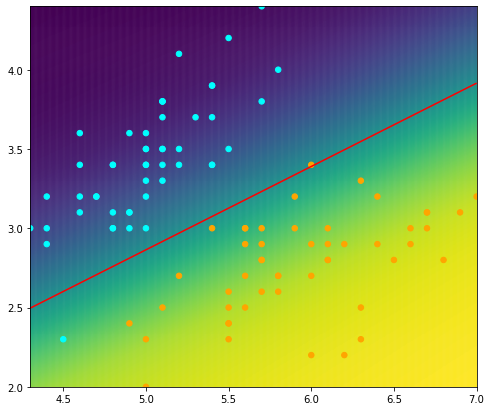

In [8]:
predict_nn = lambda x : model.predict(x)
DecisionBoundary(X, 384, model, predict_nn)

For the overfit situation:

![Overfitting](Overfit.png)

### 1.3-Validation

In order to understand whether we are generalizing well: do validation.

We split the dataset and only train on a part of it

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

We obtain two sets with dimensions:

In [10]:
X_train.shape

(67, 2)

In [11]:
X_test.shape

(33, 2)

We now train the model:

In [12]:
model = MakeModel(1)

model.fit(X_train, y_train, epochs=250, batch_size=20, verbose=1)

Epoch 1/250
4/4 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5373
Epoch 2/250
4/4 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5373
Epoch 3/250
4/4 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.5373
Epoch 4/250
4/4 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.5373
Epoch 5/250
4/4 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5373
Epoch 6/250
4/4 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5373
Epoch 7/250
4/4 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.5373
Epoch 8/250
4/4 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.5373
Epoch 9/250
4/4 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.5373
Epoch 10/250
4/4 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.5373
Epoch 11/250
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.9851
Epoch 168/250
4/4 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.9851
Epoch 169/250
4/4 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.9851
Epoch 170/250
4/4 [==============================] - 0s 4ms/step - loss: 0.4430 - accuracy: 0.9851
Epoch 171/250
4/4 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.9851
Epoch 172/250
4/4 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.9851
Epoch 173/250
4/4 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.9851
Epoch 174/250
4/4 [==============================] - 0s 3ms/step - loss: 0.4357 - accuracy: 0.9851
Epoch 175/250
4/4 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.9851
Epoch 176/250
4/4 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.9851
Epoch 177/250
4/4 [=====

Evaluate generalization score:

In [13]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.2963 - accuracy: 1.0000


[0.2963346838951111, 1.0]

If both train and test accuracies are low: underfitting

If train is high and test is low: overfitting

## 2-Our System

Let us now introduce the technical details of our solution 

### 2.0-Integrations and Visualization
Let us now introduce some routines needed to integrate the Hénon-Heiles system.
We also wish to visualize a Poincaré section and the behaviour of the chaotic indicators.

In [14]:
import os, sys
os.chdir("../")
from Utils import RunExperimentDict, PresentExperiment
from Features import *
from Model import *

In order to run a simulation of the HH system we need to provide a dictionary containing all the physical and numerical parameters needed.

A symplectic integrator of the orbit and the tangent dynamics is run in C++, saved on a file and loaded in Python.
Chaotic Indicators are computed and all the relevant data is returned in an "experiment" dictionary.

The setup dictionary contains the following fields:

In [15]:
setup = {}

### Physical Parameters ###
setup["w0"] = 1.0      # Frequency
setup["w1"] = 1.0      # Frequency
setup["q0"] = 0.0      # Value of q_0
setup["q1"] = 0.1      # Value of q_1
setup["p1"] = 0.0      # Value of p_1
setup["E"] = 0.125     # Energy of the system

### Numerical Parameters ###
setup["Tstep"] = 1e-3  # Integration step size
setup["Tprint"] = 1e-2 # Printing step size
setup["Tf"] = 1e4      # Final integration time
setup["solver"] = 1    # Whether to use a corrector, 1=True

RunExperimentDict integrates the system from the "setup" variable and saves the results in a file called "NAME"

In [16]:
exp_order = RunExperimentDict(setup, NAME="test")

We obtain a dictionary "exp" with the following fields and values:

In [17]:
exp_order

{'w0': 1.0,
 'w1': 1.0,
 'q0': 0.0,
 'E': 0.125,
 'q1': 0.1,
 'p1': 0.0,
 'Tstep': 0.001,
 'Tf': 10000.0,
 'Tprint': 0.01,
 'solver': 1,
 'ID': 'test_live',
 'SALI': array([1.41421356, 1.41417888, 1.41407488, ..., 1.37342012, 1.37021513,
        1.36703955]),
 'FLI': array([1.        , 1.000012  , 1.00004801, ..., 1.75315621, 1.75047604,
        1.74772715]),
 'MEGNO': array([ 2.40014543e-05,  5.40067968e-05,  9.46880388e-05, ...,
        -9.53069882e-03, -9.53092621e-03, -9.53115632e-03]),
 'orbit': array([[ 0.        ,  0.1       ,  0.49057789,  0.        ],
        [ 0.00490568,  0.0999955 ,  0.49054846, -0.00090007],
        [ 0.00981077,  0.099982  ,  0.49046016, -0.00180055],
        ...,
        [-0.15364825, -0.34724329, -0.27278859, -0.14100618],
        [-0.15637379, -0.34863112, -0.27231718, -0.13655643],
        [-0.15909458, -0.34997437, -0.27184179, -0.13209202]]),
 'tangents': [array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00],
       

A simpler visualization can be obtained through the "PresentExperiment" interface:

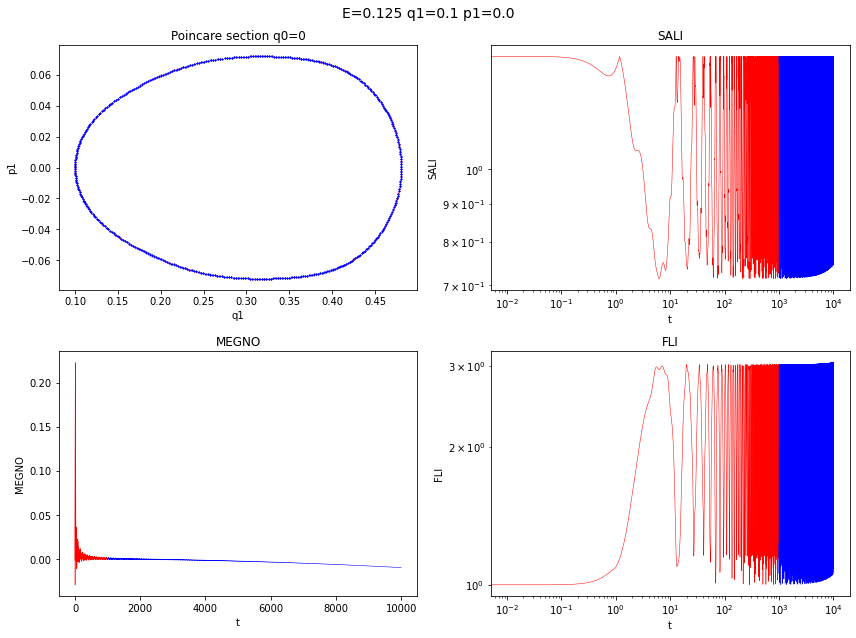

In [18]:
PresentExperiment(exp_order, time=1e3)

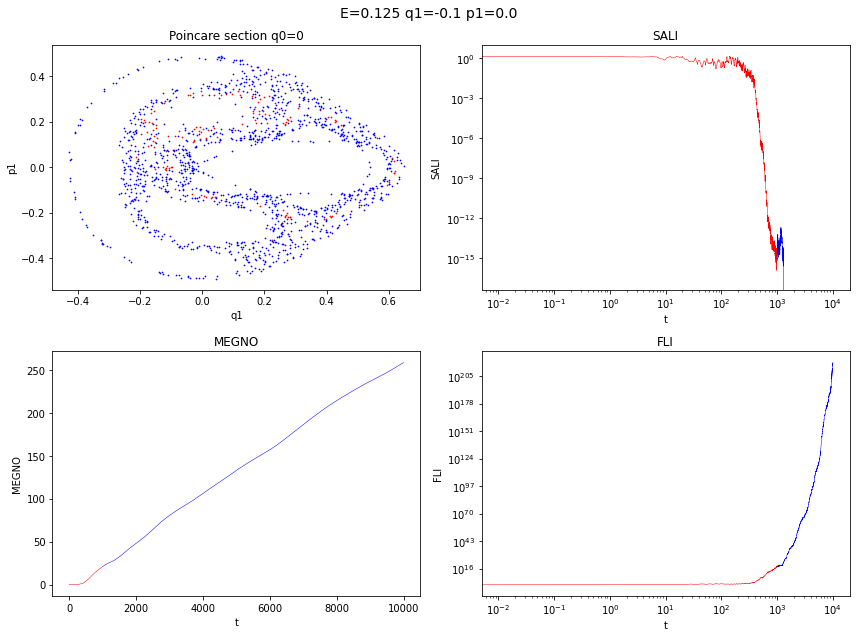

In [19]:
setup_chaos = dict(setup)
setup_chaos["q1"] = -0.1
exp_chaos = RunExperimentDict(setup_chaos, NAME="test")
PresentExperiment(exp_chaos, time=1e3)

### 2.1-Assigning a Label
In order to create a dataset, we need to assign to each orbit a "label": e.g. whether it is chaotic or not.
In order to do this, our only option is to use the classical method.
We then integrate the system for $T_f = 10^5$ and enforce some conditions of the form
$$ \text{MEGNO}(T_f)>t_M \quad \text{SALI}(T_f) < t_S \quad \text{FLI}(T_f) > t_F \cdot T_f $$

The values of the thresholds and their functional form have been chosen following [Maffione2011].

We only keep orbits in which all three indicators agree (most of them).

It is important to note that in most of disagreements, MEGNO thinks the orbit is not chaotic, the other two indicators however think it is.

We illustrate a function that assigns a label to a given experiment:

In [20]:
from LabelDataset import *

# Determine if a given experiment is chaotic according to FLI given a threshold
def FLI_Label(exp, treshold):
    # Eliminate NaNs and ifinities
    fli = OnlyValid(exp["FLI"])
    last = fli[-1] 
    return last > treshold * exp["Tf"]

fli_exp_order = FLI_Label(exp_order, treshold=10)
fli_exp_chaos = FLI_Label(exp_chaos, treshold=10)

print("Ordered orbit: " + str(fli_exp_order))
print("Chaotic orbit: " + str(fli_exp_chaos))

Ordered orbit: False
Chaotic orbit: True


### 2.2-Slicing the simulation

When generating the full dataset, we've had to compute a long integration up to $T_f=10^5$ in order to obtain the label.
But we want our model to take in input some quantities computed on smaller time frames.

One way to do so would be to re-run the simulation with a smaller $T_f$.

For the sake of efficiency we prefer to truncate the previous integrations instead using the function GetSlice.

We can take multiple slices from the same simulation.

In [21]:
# Number of printing steps for an experiment
def GetLen(exp):
    return len(exp["SALI"])

# Given an experiment, truncate it to keep the first (ratio)% steps
def GetSlice(exp, ratio):
    Nold = GetLen(exp)
    
    # The +1 is for the initial conditions
    Nnew = int((Nold - 1) * ratio + 1)
    
    # Copy the structure
    short = dict(exp)
    
    short["SALI"] = exp["SALI"][0:Nnew]
    short["FLI"] = exp["FLI"][0:Nnew]        
    short["MEGNO"] = exp["MEGNO"][0:Nnew]   
        
    return short

In [22]:
GetLen(exp_chaos)

1000001

In [23]:
short_chaos = GetSlice(exp_chaos, ratio=0.1)
short_order = GetSlice(exp_order, ratio=0.1)
GetLen(short_chaos)

100001

### 2.3-Computing Features

We show some examples of features that are computed from a short integration.

In [24]:
from Features import *

#### 2.3.4-Linear Fits

We first analyze linear fit features. We compute slope, intercept and score of a weighted linear fit.

The weight is
$$ w(t) = \frac{1.0}{1 + (T_f - t)^p} $$
where $p$ is a parameter. In our work $p=0.5$.

In [25]:
def LinearFit(X, y, weights=None):
    # Put in the correct format
    X = X.reshape(-1,1)

    # Compute coefficients
    reg = LinearRegression().fit(X, y, weights)
    
    # Compute metrics
    score = reg.score(X, y, weights)
    intercept = reg.intercept_
    slope = reg.coef_[0]

    return slope, intercept, score


def MegnoLinearFitFeature(exp, weight=None):
    megno = exp["MEGNO"]
    
    # Get all print times
    times = np.linspace(0, exp["Tf"], megno.shape[0]) 
    
    # Keep only valid values
    megno = OnlyValid(megno)
    times = times[0:megno.shape[0]] # Only the valid ones

    tF = times[-1]
    
    # Compute the weights according to the correct power law
    if weight is None:
        weights = np.ones_like(times)
    else:
        weights = 1.0 / (1.0 + np.power(tF - times, weight))
    
    # Compute features
    slope, intercept, score = LinearFit(times, megno, weights)

    # Enrich the "experiment" data structure
    exp["feature_megno_slope"] = slope
    exp["feature_megno_intercept"] = intercept
    exp["feature_megno_score"] = score

    return exp

Let us now compute the feature values for the two experiments:

In [26]:
MegnoLinearFitFeature(exp_chaos)
exp_chaos["feature_megno_slope"], exp_chaos["feature_megno_intercept"], exp_chaos["feature_megno_score"]

(0.026991741841255832, -4.056267041014195, 0.9986982929216484)

In [27]:
MegnoLinearFitFeature(exp_order)
exp_order["feature_megno_slope"], exp_order["feature_megno_intercept"], exp_order["feature_megno_score"]

(-1.2637749036341312e-06, 0.0037337380660431574, 0.26455430473266306)

#### 2.3.2-DFT Features

Given a signal $\left\{f_i \right\}_{i=0}^N$, we denote with $\left\{\hat{f}_i \right\}_{i=0}^N$ the amplitudes of the DFT.

We define:
$$ \text{feature_f_max_freq} = \max_{i=0}^N \hat{f}_i $$


$$ \text{feature_f_peak_ratio} = \frac{\sum_{i=0}^{10} \hat{f}_k}{\sum_{i=0}^N \hat{f}_k}$$


$$ \text{feature_f_symmetric} = \frac{\max_{i=0}^N | f_k - f_{N-k} |}{f_{max}}$$

We analyze one of the implementations:

In [28]:
def FLIFFTFeature(exp):
    flis = exp["FLI"]
    
    # Avoid overflows
    fli = np.clip(OnlyValid(flis), 0, 1e100)
    
    # Perform DFT and keep magnitudes
    ff = np.abs(fft(fli))
    
    # Compute symmetric index
    simdiff = np.max(np.abs(ff - ff[::-1]))
    
    # Compute max amplitude
    max_v = np.max(ff)
    
    # Compute peak feature
    peak = np.sum(ff[0:10]) / np.sum(ff)

    steps = len(ff)
    start = int(steps * 0.2)
    stop = int(steps * 0.8)

    # Compute total variation
    tv = np.sum(np.abs(np.diff(ff[start:stop])))
    
    exp["feature_fli_max_freq"] = np.log(max_v)
    exp["feature_fli_peak_ratio"] = peak
    exp["feature_fli_symmetric"] = simdiff / max_v
    exp["feature_fli_tv_freq"] = tv / max_v

    return exp

Let us now compute the feature values for the two experiments:

In [29]:
FLIFFTFeature(exp_chaos)
exp_chaos["feature_fli_max_freq"], exp_chaos["feature_fli_peak_ratio"], exp_chaos["feature_fli_symmetric"], exp_chaos["feature_fli_tv_freq"]

(243.47185172913655,
 0.21344986203330563,
 0.48908608597238407,
 0.0019411338978045675)

In [30]:
FLIFFTFeature(exp_order)
exp_order["feature_fli_max_freq"], exp_order["feature_fli_peak_ratio"], exp_order["feature_fli_symmetric"], exp_order["feature_fli_tv_freq"]

(14.59766082422823,
 0.3021283921857855,
 0.9963829441776253,
 0.0005745591860620236)

#### 2.3.3-CNN Features

Computing features for the CNN is much simpler. All we need to do is subsample the sequence:

In [31]:
def CNNFeatures(exp):
    # Compute number of steps
    N = int(exp["Tf"] / exp["Tprint"])

    # Subsample a either 512 steps or less if none are available
    pick = min(512, N+1)

    # Pick "pick" (almost)-evenly spaced integers between 0 and N-1
    idx = np.round(np.linspace(0, N-1, pick)).astype(int)

    # Create a 3 x "pick" matrix
    vals = np.zeros((1, 3, pick, 1))
    
    # Fill first row with log(FLI), sampled and clipped to avoid overflows
    vals[0,0,:,0] = np.log(np.clip(exp["FLI"], 1e-15, 1e100))[idx]
    
    # Fill second and third rows with SALI and MEGNO, sampled
    vals[0,1,:,0] = exp["SALI"][idx]
    vals[0,2,:,0] = exp["MEGNO"][idx]

    exp["vals"] = vals
    return exp

In [32]:
CNNFeatures(exp_chaos);

In [33]:
import pandas as pd

# Prints a matrix in a nice table fashion
def PrettyPrintMatrix(mat, idx):
    return pd.DataFrame(np.squeeze(mat), index=idx)

PrettyPrintMatrix(exp_chaos["vals"], idx=["log(FLI)", "SALI", "MEGNO"])

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
log(FLI),0.000000,0.918453,1.473069,2.076672,2.537565,2.393544,1.732520,1.850140,1.419392,1.235320,...,230.258509,230.258509,230.258509,230.258509,230.258509,230.258509,230.258509,230.258509,230.258509,230.258509
SALI,1.414214,1.282318,0.674569,0.443087,0.284211,0.223487,0.546957,0.886076,1.009910,0.998913,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MEGNO,-0.000016,-0.045249,0.297404,0.485561,0.539522,0.558850,0.308594,0.095780,0.016739,0.027758,...,254.560041,255.023964,255.490962,255.959963,256.425900,256.892000,257.360542,257.830681,258.302200,258.775198


We now have everything we need in order to create a dataset.
The training and evaluation procedure is carried out as explained in the section 1.

Due to lack of time we cannot reproduce the result live.

### 2.4-Making an End-To-End prediction

Now that we have illustrated the internals of the system, we showcase how to use the pre-trained models to perform predictions on the nature of the system.

The functionality is provided as a set of classes.

Internally, given some initial data, each class performs the following:
* Integrate the system for the short time $T_f$
* Compute the features from the short integration
* Feed the features to the ML model for a prediction

In [34]:
# Load two Random Forest models
rf_100 = RFModel("Notebooks/RF100")
rf_1000 = RFModel("Notebooks/RF1000")

In [35]:
%%timeit
rf_100.PredictInitialData(exp_chaos)

186 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
rf_1000.PredictInitialData(exp_chaos)

array([1.])

In [37]:
# Load two CNN models
cnn_100 = CNNModel("Notebooks/CNN100")
cnn_1000 = CNNModel("Notebooks/CNN1000")

In [38]:
cnn_100.PredictInitialData(exp_chaos)

array([0.9868429], dtype=float32)

In [39]:
cnn_1000.PredictInitialData(exp_chaos)

array([1.], dtype=float32)

### 2.5-Grid Predictions

We provie an utility to predict the behaviour of a grid of initial conditions in parallel.

Let us begin by creating a list of initial conditions:

In [40]:
# List of experiment setups
setups = []

# Prototype for all the simulations
run = {}
run["w0"] = 1.0
run["w1"] = 1.0
run["q0"] = 0.0
run["E"] = 0.125
run["p1"] = 0.0
    

# Grid of 64 equally spaced values
for q1 in np.linspace(-0.03, 0.03, 64):
    # Copy the prototype
    setup = dict(run)
    setup["q1"] = q1
    
    setups.append(setup)

We now extract the predictions:

In [41]:
predictions = rf_100.PredictGrid(setups)

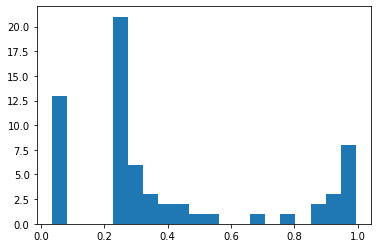

In [42]:
plt.hist(predictions, bins=20);

The implementation looks as follows:

In [43]:
# Gives a prediction of initial "setups" for a system of dimension "dim".
# Perform chunking with chunks of size "batchsize" which get processed by "concurrency" cores
def PredictGrid(self, setups, dim=4, batchsize=64, concurrency=None):
    
    # Determine how many CPU cores to use
    if concurrency is None:
        concurrency = multiprocessing.cpu_count()

    # Make sure the function "GetIntegration" is correctly parallelizable
    integrate = partial(self.GetIntegration, cleanup=False, dim=dim)

    # Save the prediction
    preds = []

    # Split the list of simulation "setups" in chunks of size "batchsize"
    for chunk in chunks(setups, batchsize):
        # Work on each chunk separately
        with Pool(concurrency) as p:
            # Integrate the chunk in parallel (efficient because each integration is independent)
            integrations = p.map(integrate, chunk) 
            
            # Compute features from all the integrations in parallel (efficient for the same reason)
            features = p.map(self.GetFeatures, integrations)
            # Convert to numpy array containing the features of all the simulations in the chunk
            features = np.squeeze(np.array(features))
            
            # Predict a class for all the elements in chunk (already parallel thanks to Keras)
            pred_chunk = self.PredictFeatures(features)

            # Append the chunk predictions to the final array
            if len(preds) == 0:
                preds = pred_chunk
            else:
                preds = np.append(preds, pred_chunk)

    # Format the result
    preds = np.array(preds).flatten()
    return preds